# ProductHunt Analysis (part 2)

### TL;DR

**Question 4**: Which _topics_ (i.e. tags) tend to group together?

TODO

**Question 5**: What trends are in the _taglines_?

TODO

**Want more detail?**

Below is the nitty-gritty detail, for those who care. :)

This notebook will have a similar flow to the _Part 1_ and _Part 2_ notebook.

# Details

In [8]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_info_columns', -1)
pd.set_option('display.max_info_rows', -1)

from scipy.stats import ttest_ind, f_oneway

import graphviz    # http://graphviz.readthedocs.io/en/latest/manual.html
from graphviz import Digraph, Graph

from wordcloud import WordCloud

from IPython.display import Image

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

if 'galvanize' in plt.style.available:
    plt.style.use('galvanize')
else:
    print 'Forgoing the galvanize matplotlib style...'
    
import textacy

In [2]:
ALPHA_CUTOFF = 0.01

In [3]:
topics = pd.read_csv('producthunt-product-hunt-research/AllTopics.csv')

In [5]:
posts = pd.read_csv('producthunt-product-hunt-research/PostsForAnalysis.csv',
                    parse_dates=['date', 'created_at'], infer_datetime_format=True)

# Fix the NaNs which appear in all the topic columns.
topic_cols = range(12, 313)
posts.iloc[:,topic_cols] = posts.iloc[:,topic_cols].fillna(False).astype(bool)

In [6]:
posts['year_month'] = posts['created_at'].map(lambda x: '{}.{:02d}'.format(x.year, x.month))
posts['year_quarter'] = posts['created_at'].map(lambda x: '{}.q{}'.format(x.year, (x.month+2)/3))

# Question 4: Which _topics_ (i.e. tags) tend to group together?


In [77]:
posts['tags']

0        [artificial.intelligence, design.tools, photography.tools, tech, web]                             
1        [artificial.intelligence, bots, developer.tools, tech]                                            
2        [tech, virtual.reality]                                                                           
3        [design.tools, developer.tools, mac, mac.menu.bar.apps, tech, touch.bar.apps]                     
4        [design.tools, developer.tools, productivity, tech, usability, user.experience]                   
5        [fintech, payment, tech]                                                                          
6        [artificial.intelligence, get.shit.done, productivity, task.management, tech, to.do]              
7        [artificial.intelligence, tech]                                                                   
8        [developer.tools, mac, tech]                                                                      
9        [customer.communica

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [72]:
posts['tags'] = posts.ix[:, topic_cols].apply(lambda row: pd.Series({'tags': row[row].index.values}), axis=1)

In [81]:
def my_tokenizer(elem):
    return elem.split(' ')

vectorizer = CountVectorizer(tokenizer=my_tokenizer, stop_words=['tech'])

doc_term_matrix = vectorizer.fit_transform(posts['tags'].apply(lambda elem: ' '.join(elem)))
vocabulary = vectorizer.get_feature_names()

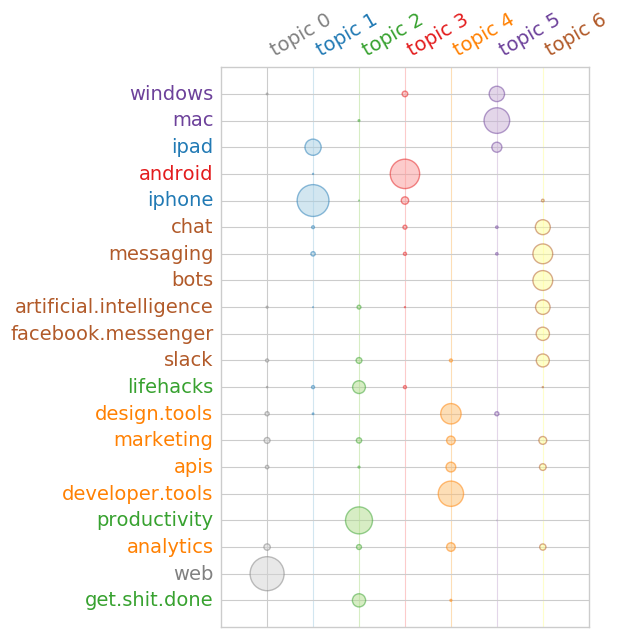

In [99]:
model = textacy.tm.TopicModel('nmf', n_topics=7)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
model.termite_plot(doc_term_matrix, vocabulary, highlight_topics=[1, 2, 3, 4, 5, 6], n_terms=20)